### 자연어 처리 리뷰활용
* konlpy를 이용한 자연어처리


In [3]:
import sqlite3
from konlpy.tag import *
from konlpy.utils import pprint

### 형태소 분석기 초기화

In [4]:
hannanum = Hannanum()
kkma = Kkma()
okt = Okt()

D:\anaconda\lib\site-packages\jpype\_core.py:210: UserWarning: 
-------------------------------------------------------------------------------
Deprecated: convertStrings was not specified when starting the JVM. The default
behavior in JPype will be False starting in JPype 0.8. The recommended setting
for new code is convertStrings=False.  The legacy value of True was assumed for
this session. If you are a user of an application that reported this warning,
please file a ticket with the developer.
-------------------------------------------------------------------------------

  """)


In [5]:

c="안녕하세요 여러분"
kkma.nouns(c[:40])
#hannanum.nouns(c[:40])
#pprint(kkma.sentences(u'네, 안녕하세요. 반갑습니다.'))
#pprint(kkma.nouns(u'질문이나 건의사항은 깃헙 이슈 트래커에 남겨주세요.'))

['안녕', '여러분']

In [6]:
dbname="nmovie.db"

In [7]:
def seldb():
    with sqlite3.connect(dbname) as conn:
        cur=conn.cursor()
        sql="""
        select 
        IDX,TITLE,CONTENT,POINT,TCODE
        from movie 

        """
#        where TCODE='"""+str(tcode)+"""'
#        order by IDX        
        data=cur.execute(sql).fetchall()
        xdata=[]
        ydata=[]
        i=0
        for d in data:
            xdata.append(i)
            ydata.append((d[2],d[3],d[4]))
            i+=1
            #print(d,end="\n")
        conn.commit()
        cur.close()
        return (xdata,ydata)

In [8]:
gdata=seldb()
print(gdata[1][:10])

[('스토리 내용의 재미를 좋아하는데 진짜 OOO기 영화였고 시간이 아까웠음', 4, 3), ('일본 망해라. 일본 망해라. 일본 망해라. 일본 망해라.', 1, 128), ('존윅4 언제 기다리냐 ㅠㅠㅠ', 10, 10), ('그냥 스파이더맨이라 보러간던데 역시 마블의 밝은 분위기가 재밌어요', 10, 3), ('진짜 노잼... 예고편도 재미없더니 본영화는 더 없네', 4, 5), ('발재간이 압권 ㅋㅋㅋㅋ', 7, 127), ('꼭 사극+코믹장르면 망하더라ㄷㄷ', 2, 5), ('재미있었지만, 토니 스타크의 공백이 남아있다.', 8, 3), ('단순히 막판 반전만이 이 영화의 전부라고 생각하지 마시길....', 10, 126), ('다시보고싶은 영화중 하나!', 10, 76)]


### 워드 클라우드 


In [9]:
import matplotlib
import matplotlib.pyplot as plt
plt.figure(figsize=(24,24))
import matplotlib.font_manager as fm
font_location = 'malgun.ttf'  
#C:\\Users\\Administrator\\Documents\\asiasummer\\webdata\\
font_name = fm.FontProperties(fname = font_location).get_name()
matplotlib.rc('font', family = font_name)

#print(font_name)

### 워드 클라우드를 위한 데이터 합치기

In [10]:
#plt.rcParams["font.family"] = 'Malgun Gothic'
from wordcloud import WordCloud
c=""
for g in gdata[1]:
    c+=g[0]

print(c[:100])


스토리 내용의 재미를 좋아하는데 진짜 OOO기 영화였고 시간이 아까웠음일본 망해라. 일본 망해라. 일본 망해라. 일본 망해라.존윅4 언제 기다리냐 ㅠㅠㅠ그냥 스파이더맨이라 보러간던


In [11]:
w = WordCloud(
    font_path = 'malgun.ttf',
    width = 1920,
    height = 1080
)
w=w.generate(c)
w.words_
print(w)

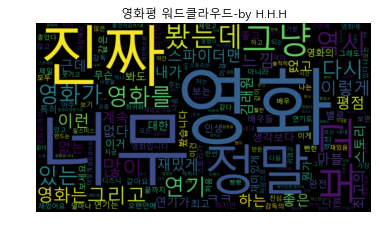

In [12]:
plt.imshow(w,interpolation='bilinear')
plt.axis('off')
plt.title("영화평 워드클라우드-by H.H.H")
plt.savefig('moviecloud.jpg')
plt.show()


In [13]:
f = open("stopmovie.txt", 'r',encoding='utf-8')
stopkr=[]
while True:
    line = f.readline()
    if not line: break
    stopkr.append(line.strip())
f.close()
print(stopkr[670:])

['일곱', '여덟', '아홉', '령', '영', '또는', '영화', '영화가', '영화를', '영화는']


### 불용어 제거 버전

In [14]:
import nltk
from nltk.tokenize import word_tokenize 
nltk.download('punkt')
word=word_tokenize(c)
print(word[:10])

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\rkdgu\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


['스토리', '내용의', '재미를', '좋아하는데', '진짜', 'OOO기', '영화였고', '시간이', '아까웠음일본', '망해라']


In [15]:
newc=''
for w in word:
    if w not in stopkr:
        newc+=w.strip()+' '
print(newc[:100])

스토리 내용의 재미를 좋아하는데 진짜 OOO기 영화였고 시간이 아까웠음일본 망해라 . 일본 망해라 . 일본 망해라 . 일본 망해라.존윅4 기다리냐 ㅠㅠㅠ그냥 스파이더맨이라 보러간던


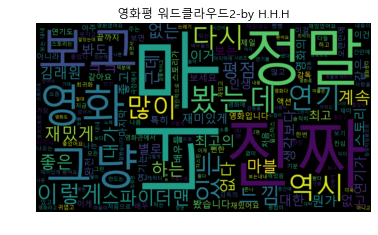

In [16]:
w = WordCloud(
    font_path = 'malgun.ttf',
    width = 1920,
    height = 1080
)
w=w.generate(newc)
w.words_
print(w)
plt.imshow(w,interpolation='bilinear')
plt.axis('off')
plt.title("영화평 워드클라우드2-by H.H.H")
plt.savefig('moviecloud.jpg')
plt.show()

### 단어 빈출 분석을 통한 의미 분석
* 형태소 분석

In [17]:
ht=okt.pos(c)
print(ht[:50])

[('스토리', 'Noun'), ('내용', 'Noun'), ('의', 'Josa'), ('재미', 'Noun'), ('를', 'Josa'), ('좋아하는데', 'Adjective'), ('진짜', 'Noun'), ('OOO', 'Alpha'), ('기', 'Noun'), ('영화', 'Noun'), ('였고', 'Verb'), ('시간', 'Noun'), ('이', 'Josa'), ('아까웠음', 'Adjective'), ('일본', 'Noun'), ('망해라', 'Adjective'), ('.', 'Punctuation'), ('일본', 'Noun'), ('망해라', 'Adjective'), ('.', 'Punctuation'), ('일본', 'Noun'), ('망해라', 'Adjective'), ('.', 'Punctuation'), ('일본', 'Noun'), ('망해라', 'Adjective'), ('.', 'Punctuation'), ('존윅', 'Noun'), ('4', 'Number'), ('언제', 'Noun'), ('기다리냐', 'Verb'), ('ㅠㅠㅠ', 'KoreanParticle'), ('그냥', 'Noun'), ('스파이더맨', 'Noun'), ('이라', 'Josa'), ('보러', 'Verb'), ('간던데', 'Verb'), ('역시', 'Noun'), ('마블', 'Noun'), ('의', 'Josa'), ('밝은', 'Verb'), ('분위기', 'Noun'), ('가', 'Josa'), ('재밌어요', 'Adjective'), ('진짜', 'Noun'), ('노잼', 'Noun'), ('...', 'Punctuation'), ('예고편', 'Noun'), ('도', 'Josa'), ('재미없더니', 'Adjective'), ('본', 'Modifier')]


In [18]:
import json
import os,sys
import pprint

###  트레이닝 데이터와 테스트 테이터 만들기
* 트레이닝 데이터용 함수


In [19]:
origin=gdata[1]
train_data=origin[:1200]
test_data=origin[1200:]
res=[]
def tokenize(data):
    return ['/'.join(t) for t in okt.pos(data,stem=True,norm=True)]

def makedata(data):
    return [(tokenize(td[0]),td[1]) for td in data]

#r=tokenize(train_data[0][0])
r=makedata(train_data)
print(r[:10])


[(['스토리/Noun', '내용/Noun', '의/Josa', '재미/Noun', '를/Josa', '좋아하다/Adjective', '진짜/Noun', 'OOO/Alpha', '기/Noun', '영화/Noun', '이다/Verb', '시간/Noun', '이/Josa', '아깝다/Adjective'], 4), (['일본/Noun', '망하다/Adjective', './Punctuation', '일본/Noun', '망하다/Adjective', './Punctuation', '일본/Noun', '망하다/Adjective', './Punctuation', '일본/Noun', '망하다/Adjective', './Punctuation'], 1), (['존윅/Noun', '4/Number', '언제/Noun', '기다리다/Verb', 'ㅠㅠㅠ/KoreanParticle'], 10), (['그냥/Noun', '스파이더맨/Noun', '이라/Josa', '보다/Verb', '가다/Verb', '역시/Noun', '마블/Noun', '의/Josa', '밝다/Verb', '분위기/Noun', '가/Josa', '재밌다/Adjective'], 10), (['진짜/Noun', '노잼/Noun', '.../Punctuation', '예고편/Noun', '도/Josa', '재미없다/Adjective', '본/Modifier', '영화/Noun', '는/Josa', '더/Noun', '없다/Adjective'], 4), (['발/Noun', '재간/Noun', '이/Josa', '압권/Noun', 'ㅋㅋㅋ/KoreanParticle'], 7), (['꼭/Noun', '사극/Noun', '+/Punctuation', '코믹/Noun', '장르/Noun', '면/Josa', '망하다/Adjective', 'ㄷㄷ/KoreanParticle'], 2), (['재미있다/Adjective', ',/Punctuation', '토니/Noun', '스타크/Noun', '의/Josa', '공백/Noun'

* 파일이 있으면 불러와서 트레이닝 데이터를 만들고
* 파일이 없으면 트레이닝 데이터 만들기


In [20]:
  
train_file='train_data.json'
test_file='test_data.json'
if os.path.isfile(train_file):
    with open(train_file,'r',encoding='utf-8') as f:
        train_doc=json.load(f)
else:
    train_doc=makedata(train_data)
if os.path.isfile(test_file):
    with open(test_file,'r',encoding='utf-8') as f:
        test_doc=json.load(f)
else:
    test_doc=makedata(test_data)
print(len(train_doc))
print(len(test_doc))

1200
642


### 빈도수 추출을 위해 형태소를 한군데로 모으기

In [21]:
tokens=[t for tr in train_doc for t in tr[0]]
print(tokens[:20])

['스토리/Noun', '내용/Noun', '의/Josa', '재미/Noun', '를/Josa', '좋아하다/Adjective', '진짜/Noun', 'OOO/Alpha', '기/Noun', '영화/Noun', '이다/Verb', '시간/Noun', '이/Josa', '아깝다/Adjective', '일본/Noun', '망하다/Adjective', './Punctuation', '일본/Noun', '망하다/Adjective', './Punctuation']


### 토큰분석을 위한 nltk 객체 생성

In [22]:
txt=nltk.Text(tokens,name='nlmovie')
print(txt)

<Text: nlmovie>


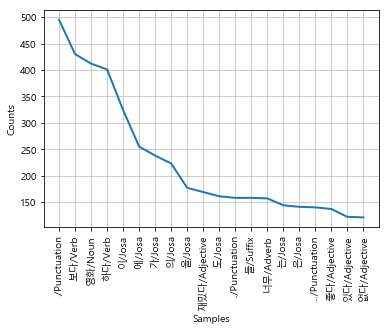

In [23]:
txt.plot(20)

### 빈도순으로 추출된 토큰 준비

In [24]:
sel_token=[f[0] for f in txt.vocab().most_common(1000)]
print(sel_token[:10])

['./Punctuation', '보다/Verb', '영화/Noun', '하다/Verb', '이/Josa', '에/Josa', '가/Josa', '의/Josa', '을/Josa', '재밌다/Adjective']


### 학습용 데이터 생성
* train_x: 워드 빈출 벡터
* train_y: 점수

In [25]:
def frev(doc):
    return [doc.count(stoken) for stoken in sel_token]
doc=train_doc[0][0]
print(doc)
#(['하다/Verb',... './Punctuation'], 10)
train_x=[frev(d) for d,_ in train_doc]
train_y=[d for _,d in train_doc]

test_x=[frev(d) for d,_ in test_doc]
test_y=[d for _,d in test_doc]

test_y[:2]

['스토리/Noun', '내용/Noun', '의/Josa', '재미/Noun', '를/Josa', '좋아하다/Adjective', '진짜/Noun', 'OOO/Alpha', '기/Noun', '영화/Noun', '이다/Verb', '시간/Noun', '이/Josa', '아깝다/Adjective']


[10, 1]

### 머신러닝을 위한 형변환

In [26]:
import numpy as np
train_x=np.asarray(train_x).astype('float32')
train_y=np.asarray(train_y).astype('float32')
test_x=np.asarray(test_x).astype('float32')
test_y=np.asarray(test_y).astype('float32')

In [27]:
from keras import models
from keras import layers
#from tensorflow.keras import optimizer
from keras import losses
from keras import metrics
#from tensorflow.keras import layer.Dense

Using TensorFlow backend.


In [32]:
model=models.Sequential()
model.add(layers.Dense(64, activation='relu',input_shape=(1000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(1,activation='sigmoid'))
model.compile(optimizer='adam'
             ,loss=losses.binary_crossentropy
             ,metrics=[metrics.binary_accuracy]
            )
model.fit(train_x,train_y,epochs=30,batch_size=512)
result=model.evaluate(test_x,test_y)

Epoch 1/30
1200/1200 [==============================] - 0s 245us/step - loss: 0.6411 - binary_accuracy: 0.0467
Epoch 2/30
1200/1200 [==============================] - 0s 20us/step - loss: -0.5105 - binary_accuracy: 0.0933
Epoch 3/30
1200/1200 [==============================] - 0s 19us/step - loss: -1.8123 - binary_accuracy: 0.0942
Epoch 4/30
1200/1200 [==============================] - 0s 22us/step - loss: -3.3504 - binary_accuracy: 0.0942
Epoch 5/30
1200/1200 [==============================] - 0s 22us/step - loss: -5.2412 - binary_accuracy: 0.0942
Epoch 6/30
1200/1200 [==============================] - 0s 22us/step - loss: -7.5678 - binary_accuracy: 0.0942
Epoch 7/30
1200/1200 [==============================] - 0s 22us/step - loss: -10.3731 - binary_accuracy: 0.0942
Epoch 8/30
1200/1200 [==============================] - 0s 20us/step - loss: -13.7509 - binary_accuracy: 0.0942
Epoch 9/30
1200/1200 [==============================] - 0s 22us/step - loss: -17.9142 - binary_accuracy: 0.094

In [31]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 64)                64064     
_________________________________________________________________
dense_5 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 65        
Total params: 68,289
Trainable params: 68,289
Non-trainable params: 0
_________________________________________________________________
